In [ ]:
import os
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from google.colab import files
import cv2


In [ ]:
print("Please upload the dataset ZIP file:")
uploaded = files.upload()  # Opens file upload dialog


Please upload the dataset ZIP file:


Saving CHASE.zip to CHASE.zip


In [ ]:
zip_file_path = list(uploaded.keys())[0]  # Get the uploaded file name
extract_to_path = "/content/CHASE"  # Destination folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)


In [ ]:
print(f"Dataset extracted to: {extract_to_path}")


Dataset extracted to: /content/CHASE


In [ ]:
import os

# Debugging folder structure
for root, dirs, files in os.walk("/content/CHASE"):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files}")
    print("-" * 50)


Root: /content/CHASE
Directories: ['CHASE']
Files: []
--------------------------------------------------
Root: /content/CHASE/CHASE
Directories: ['train', 'validate', 'test']
Files: []
--------------------------------------------------
Root: /content/CHASE/CHASE/train
Directories: ['image', 'label']
Files: []
--------------------------------------------------
Root: /content/CHASE/CHASE/train/image
Directories: []
Files: ['randomGaussian1Image_08R.jpg', 'vImage_04R.jpg', 'hImage_10L.jpg', 'randomGaussian0Image_07L.jpg', 'hvImage_09L.jpg', 'hvImage_10L.jpg', 'randomRotation1Image_05L.jpg', 'randomGaussian1Image_04L.jpg', 'randomColor0Image_07R.jpg', 'randomRotation1Image_07L.jpg', 'hImage_10R.jpg', 'hvImage_01R.jpg', 'randomColor2Image_10R.jpg', 'randomGaussian1Image_10R.jpg', 'randomColor0Image_06R.jpg', 'randomRotation0Image_09R.jpg', 'Image_01L.jpg', 'randomGaussian2Image_05R.jpg', 'randomGaussian0Image_01L.jpg', 'randomGaussian2Image_02L.jpg', 'randomColor2Image_07L.jpg', 'randomColo

In [ ]:
def load_data(folder):
    print("Loading data...")
    # Correct paths to 'image' and 'label' subfolders
    print(folder)
    if(folder=="/content/CHASE/CHASE/validate"):
      image_path = os.path.join(folder, "images")
      label_path = os.path.join(folder, "labels")
    else:
      image_path = os.path.join(folder, "image")
      label_path = os.path.join(folder, "label")

    images, masks = [], []

    # Get list of image filenames in the 'image' folder
    image_filenames = sorted(os.listdir(image_path))
    label_filenames = sorted(os.listdir(label_path))

    # Ensure both folders have the same number of files
    if len(image_filenames) != len(label_filenames):
        print("Number of images and masks do not match!")
        return None, None

    # Iterate over the filenames
    for img_filename, mask_filename in zip(image_filenames, label_filenames):
        # Load the image
        img = cv2.imread(os.path.join(image_path, img_filename))

        # Check if image is loaded properly
        if img is None:
            print(f"Image not found: {os.path.join(image_path, img_filename)}")
            continue

        # Resize and normalize the image
        img = cv2.resize(img, (256, 256)) / 255.0

        # Load the mask
        mask = cv2.imread(os.path.join(label_path, mask_filename), cv2.IMREAD_GRAYSCALE)

        # Check if mask is loaded properly
        if mask is None:
            print(f"Mask not found: {os.path.join(label_path, mask_filename)}")
            continue

        # Resize the mask to match the image size
        mask = cv2.resize(mask, (256, 256))

        # Add the mask channel
        mask = np.expand_dims(mask, axis=-1)

        # Append image and mask to respective lists
        images.append(img)
        masks.append(mask)

    # Convert lists to numpy arrays
    return np.array(images), np.array(masks)
train_path = os.path.join(extract_to_path, "CHASE/train")
validate_path = os.path.join(extract_to_path, "CHASE/validate")
test_path = os.path.join(extract_to_path, "CHASE/test")
print("Train image path exists:", os.path.exists(os.path.join(train_path, "image")))
print("Validate image path exists:", os.path.exists(os.path.join(validate_path, "images")))
print("Test image path exists:", os.path.exists(os.path.join(test_path, "image")))

# Load datasets
train_images, train_masks = load_data(train_path)
test_images, test_masks = load_data(test_path)
val_images,val_masks=load_data(validate_path)
print(f"Train images shape: {train_images.shape}, Train masks shape: {train_masks.shape}")
print(f"Test images shape: {test_images.shape}, Test masks shape: {test_masks.shape}")
print(f"Test images shape: {val_images.shape}, Test masks shape: {val_masks.shape}")

Train image path exists: True
Validate image path exists: True
Test image path exists: True
Loading data...
/content/CHASE/CHASE/train
Loading data...
/content/CHASE/CHASE/test
Loading data...
/content/CHASE/CHASE/validate
Train images shape: (247, 256, 256, 3), Train masks shape: (247, 256, 256, 1)
Test images shape: (8, 256, 256, 3), Test masks shape: (8, 256, 256, 1)
Test images shape: (13, 256, 256, 3), Test masks shape: (13, 256, 256, 1)


In [ ]:
train_path = os.path.join(extract_to_path, "CHASE/train", "image")
validate_path = os.path.join(extract_to_path, "CHASE/validate", "images")
test_path = os.path.join(extract_to_path, "CHASE/test", "image")

print("Train image path exists:", os.path.exists(train_path))
print("Validate image path exists:", os.path.exists(validate_path))
print("Test image path exists:", os.path.exists(test_path))


Train image path exists: True
Validate image path exists: True
Test image path exists: True


In [ ]:
train_path = os.path.join(extract_to_path, "CHASE/train")
validate_path = os.path.join(extract_to_path, "CHASE/validate")
test_path = os.path.join(extract_to_path, "CHASE/test")
print("Train image path exists:", os.path.exists(os.path.join(train_path, "image")))
print("Validate image path exists:", os.path.exists(os.path.join(validate_path, "image")))
print("Test image path exists:", os.path.exists(os.path.join(test_path, "image")))

# Load datasets
train_images, train_masks = load_data(train_path)
test_images, test_masks = load_data(test_path)

print(f"Train images shape: {train_images.shape}, Train masks shape: {train_masks.shape}")
print(f"Test images shape: {test_images.shape}, Test masks shape: {test_masks.shape}")


Train image path exists: True
Validate image path exists: False
Test image path exists: True
Loading data...
/content/CHASE/CHASE/train
Loading data...
/content/CHASE/CHASE/test
Train images shape: (247, 256, 256, 3), Train masks shape: (247, 256, 256, 1)
Test images shape: (8, 256, 256, 3), Test masks shape: (8, 256, 256, 1)


In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Check unique values in masks
print("Unique values in train_masks:", np.unique(train_masks))
print("Unique values in val_masks:", np.unique(val_masks))
print("Unique values in test_masks:", np.unique(test_masks))

# Ensure binary values for segmentation (0 and 1)
train_masks = np.where(train_masks > 0, 1, 0)
val_masks = np.where(val_masks > 0, 1, 0)
test_masks = np.where(test_masks > 0, 1, 0)

# Apply to_categorical
train_masks_cat = to_categorical(train_masks, num_classes=2)
val_masks_cat = to_categorical(val_masks, num_classes=2)
test_masks_cat = to_categorical(test_masks, num_classes=2)

# Verify shapes
print(f"Train masks shape: {train_masks_cat.shape}")
print(f"Validation masks shape: {val_masks_cat.shape}")
print(f"Test masks shape: {test_masks_cat.shape}")


Unique values in train_masks: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 

In [ ]:
def structured_dropout_unet(input_size=(256, 256, 3), dropout_rate=0.5):
    inputs = Input(input_size)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Dropout(dropout_rate)(c1)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Dropout(dropout_rate)(c2)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Dropout(dropout_rate)(c3)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    # Bottleneck
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = Dropout(dropout_rate)(c4)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)

    # Decoder
    u5 = UpSampling2D((2, 2))(c4)
    u5 = concatenate([u5, c3])
    c5 = Conv2D(256, (3, 3), activation='relu', padding='same')(u5)
    c5 = Dropout(dropout_rate)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', padding='same')(c5)

    u6 = UpSampling2D((2, 2))(c5)
    u6 = concatenate([u6, c2])
    c6 = Conv2D(128, (3, 3), activation='relu', padding='same')(u6)
    c6 = Dropout(dropout_rate)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', padding='same')(c6)

    u7 = UpSampling2D((2, 2))(c6)
    u7 = concatenate([u7, c1])
    c7 = Conv2D(64, (3, 3), activation='relu', padding='same')(u7)
    c7 = Dropout(dropout_rate)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', padding='same')(c7)

    outputs = Conv2D(2, (1, 1), activation='softmax')(c7)

    model = Model(inputs, outputs)
    return model



In [ ]:
model = structured_dropout_unet()
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_images, train_masks_cat,
    validation_data=(val_images, val_masks_cat),
    epochs=25,
    batch_size=8,
    verbose=1
)



Epoch 1/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 137s 3s/step - accuracy: 0.8087 - loss: 0.5604 - val_accuracy: 0.9052 - val_loss: 0.5495
Epoch 2/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 21s 363ms/step - accuracy: 0.9140 - loss: 0.3306 - val_accuracy: 0.9052 - val_loss: 0.3471
Epoch 3/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 21s 366ms/step - accuracy: 0.9129 - loss: 0.2773 - val_accuracy: 0.9052 - val_loss: 0.2809
Epoch 4/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 21s 369ms/step - accuracy: 0.9129 - loss: 0.2670 - val_accuracy: 0.9052 - val_loss: 0.2982
Epoch 5/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 21s 370ms/step - accuracy: 0.9131 - loss: 0.2639 - val_accuracy: 0.9052 - val_loss: 0.3374
Epoch 6/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 12s 376ms/step - accuracy: 0.9125 - loss: 0.2626 - val_accuracy: 0.9052 - val_loss: 0.3084
Epoch 7/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 12s 379ms/step - accuracy: 0.9130 - loss: 0.2592 - val_accuracy: 0.9052 - val_loss: 0.2965
Epoch 8/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 21s 380ms/step - accuracy: 0.9120 - loss: 0.2581 - val_accura

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_masks_cat)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Test Loss: 0.14699465036392212
Test Accuracy: 0.9255969543457031


In [ ]:
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 64)   │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 256, 256, 64)   │              0 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 256, 256, 64)   │         36,928 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 64)   │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 128, 128, 128)  │              0 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 128, 128, 128)  │        147,584 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 64, 64, 128)    │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 64, 64, 256)    │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 64, 64, 256)    │              0 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 64, 64, 256)    │        590,080 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 32, 32, 256)    │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 32, 32, 512)    │      1,180,160 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 32, 32, 512)    │              0 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 32, 32, 512)    │      2,359,808 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d             │ (None, 64, 64, 512)    │              0 │ conv2d_7[0][0]         │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concaten

 Total params: 23,348,936 (89.07 MB)

 Trainable params: 7,782,978 (29.69 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,565,958 (59.38 MB)

None


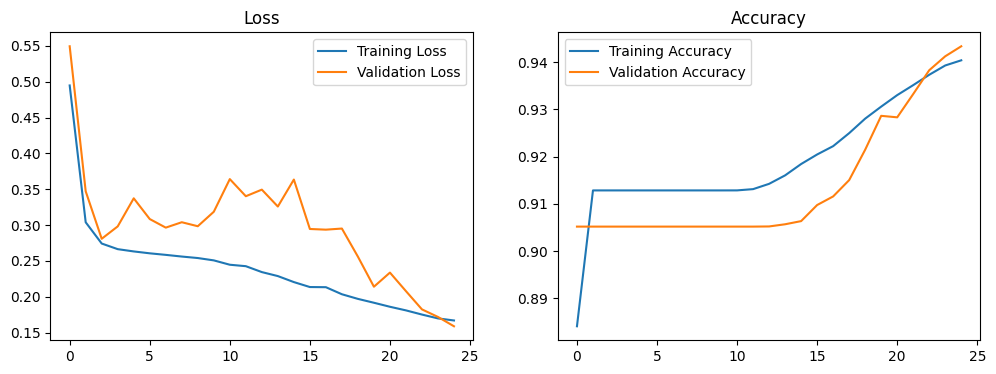

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()



In [ ]:
model.save("structured_dropout_unet.h5")


In [ ]:
predictions = model.predict(test_images)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step


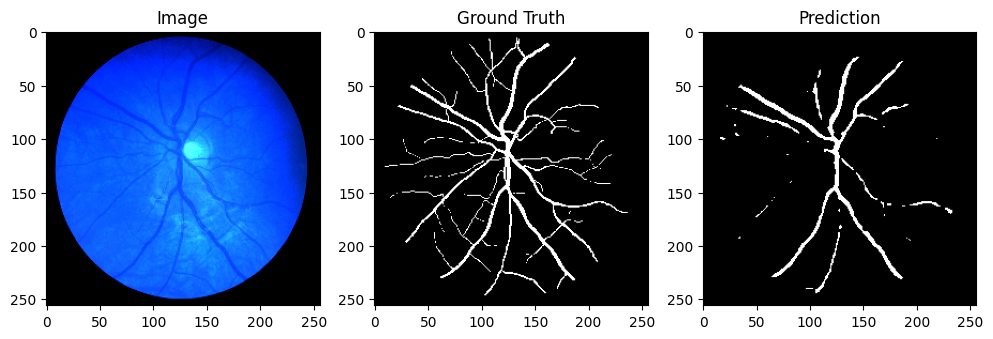

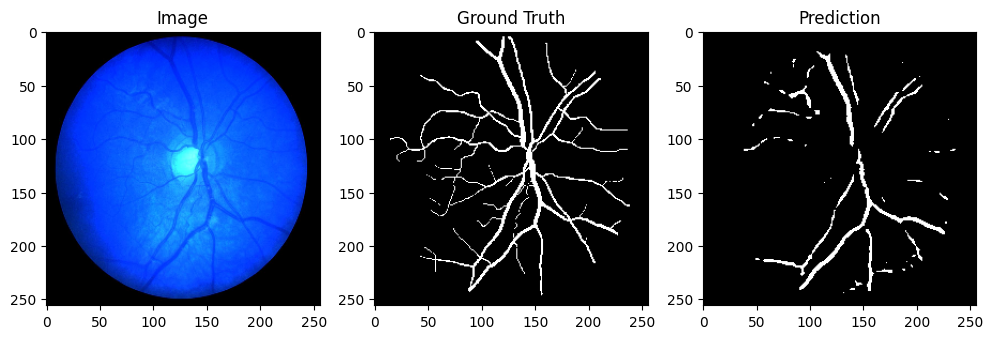

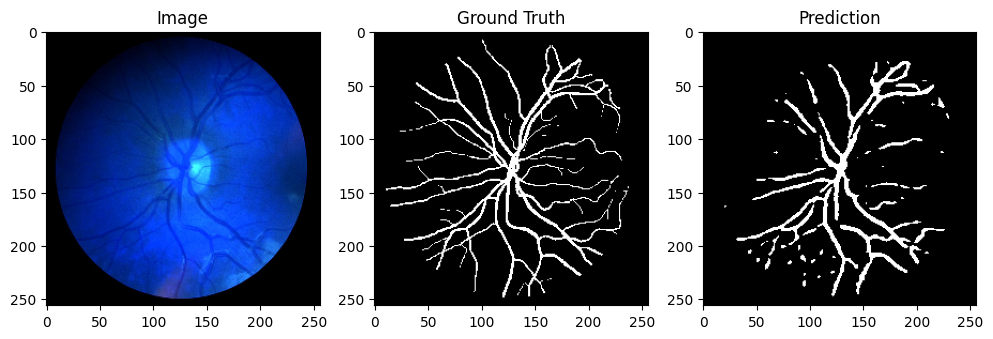

In [ ]:
def visualize_predictions(images, masks, preds, num=3):
    for i in range(num):
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.imshow(images[i])
        plt.title("Image")
        plt.subplot(1, 3, 2)
        plt.imshow(masks[i].squeeze(), cmap='gray')
        plt.title("Ground Truth")
        plt.subplot(1, 3, 3)
        plt.imshow(preds[i].argmax(axis=-1), cmap='gray')
        plt.title("Prediction")
        plt.show()

visualize_predictions(test_images, test_masks, predictions)


In [ ]:
def spatial_attention(x):
    avg_pool = layers.GlobalAveragePooling2D()(x)
    max_pool = layers.GlobalMaxPooling2D()(x)
    concatenated = layers.Concatenate(axis=-1)([avg_pool, max_pool])
    dense = layers.Dense(x.shape[-1] // 8, activation='relu')(concatenated)
    attention = layers.Dense(x.shape[-1], activation='sigmoid')(dense)
    attention = layers.Reshape((1, 1, x.shape[-1]))(attention)
    return layers.Multiply()([x, attention])


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def spatial_attention_unet(input_shape=(256, 256, 3)):
    inputs = layers.Input(input_shape)

    # Encoder: Contracting path
    conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D((2, 2))(conv1)

    conv2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D((2, 2))(conv2)

    conv3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = layers.MaxPooling2D((2, 2))(conv3)

    # Bottleneck
    conv4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(conv4)

    # Decoder: Expanding path
    up1 = layers.Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same')(conv4)
    concat1 = layers.Concatenate()([up1, conv3])
    conv5 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(concat1)
    conv5 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(conv5)

    up2 = layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same')(conv5)
    concat2 = layers.Concatenate()([up2, conv2])
    conv6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(concat2)
    conv6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv6)

    up3 = layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same')(conv6)
    concat3 = layers.Concatenate()([up3, conv1])
    conv7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(concat3)
    conv7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv7)

    # Apply spatial attention before final layer
    attention = spatial_attention(conv7)

    # Output layer
    num_classes = train_masks_cat.shape[-1]

    outputs = layers.Conv2D(num_classes, (1, 1), activation='softmax')(attention)



    model = models.Model(inputs, outputs)


    return model


In [ ]:
from tensorflow.keras.optimizers import Adam

model = spatial_attention_unet()
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_images, train_masks_cat,
    validation_data=(val_images, val_masks_cat),
    epochs=25,
    batch_size=8,
    verbose=1
)


Epoch 1/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.9112 - loss: 0.6264 - val_accuracy: 0.9052 - val_loss: 0.4371
Epoch 2/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 52s 365ms/step - accuracy: 0.9127 - loss: 0.3635 - val_accuracy: 0.9052 - val_loss: 0.2926
Epoch 3/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 21s 370ms/step - accuracy: 0.9134 - loss: 0.2697 - val_accuracy: 0.9052 - val_loss: 0.2788
Epoch 4/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 370ms/step - accuracy: 0.9122 - loss: 0.2626 - val_accuracy: 0.9052 - val_loss: 0.2784
Epoch 5/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 12s 373ms/step - accuracy: 0.9134 - loss: 0.2573 - val_accuracy: 0.9052 - val_loss: 0.2731
Epoch 6/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 370ms/step - accuracy: 0.9127 - loss: 0.2563 - val_accuracy: 0.9052 - val_loss: 0.2695
Epoch 7/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 21s 372ms/step - accuracy: 0.9132 - loss: 0.2537 - val_accuracy: 0.9052 - val_loss: 0.2686
Epoch 8/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 371ms/step - accuracy: 0.9130 - loss: 0.2486 - val_accura

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_masks_cat)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Test Loss: 0.11430859568119049
Test Accuracy: 0.9384522247314453


In [ ]:
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 64)   │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 256, 256, 64)   │         36,928 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 64)   │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 128, 128, 128)  │        147,584 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 64, 64, 128)    │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 64, 64, 256)    │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 64, 64, 256)    │        590,080 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 32, 32, 256)    │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 32, 32, 512)    │      1,180,160 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 32, 32, 512)    │      2,359,808 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose          │ (None, 64, 64, 256)    │      1,179,904 │ conv2d_7[0][0]         │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 64, 64, 512)    │              0 │ conv2d_transpose[0][0… │
│                           │                        │                │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 64, 64, 256)    │      1,179,904 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 64, 64, 256)    │        590,080 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_1        │ (None, 128, 128, 128)  │        295,040 │ conv2d_9[0][0]         │
│ (Conv2DTranspose)    

 Total params: 25,677,536 (97.95 MB)

 Trainable params: 8,559,178 (32.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,118,358 (65.30 MB)

None


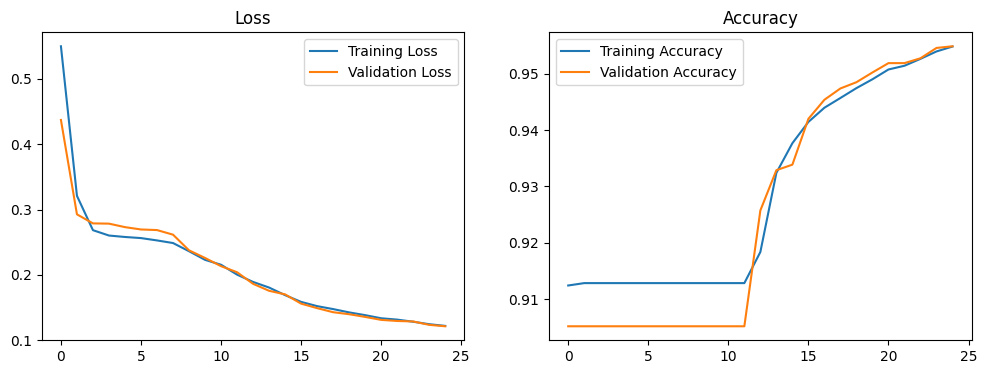

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()



In [ ]:
predictions = model.predict(test_images)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step


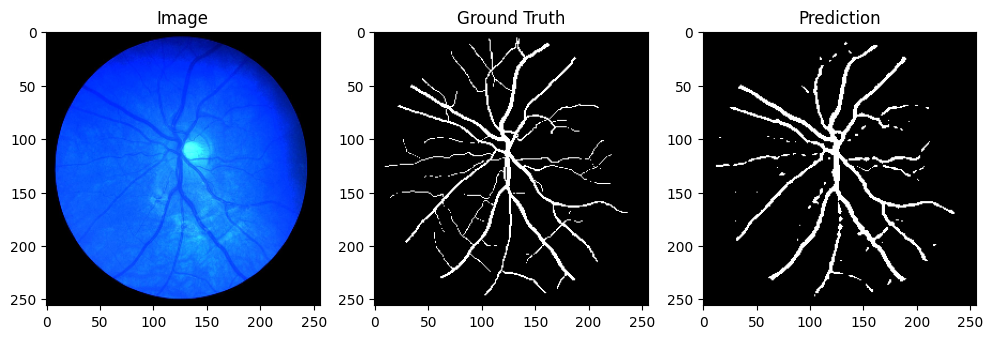

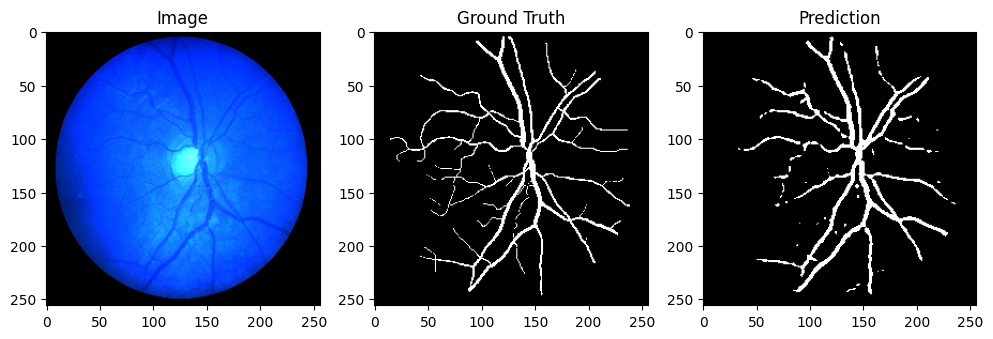

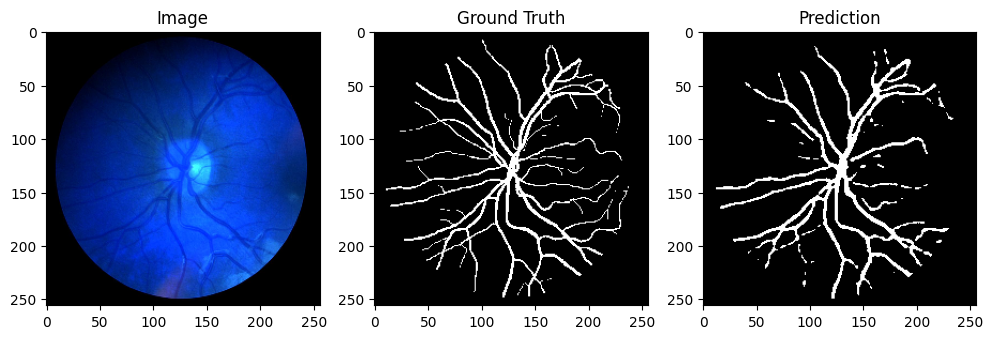

In [ ]:
def visualize_predictions(images, masks, preds, num=3):
    for i in range(num):
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.imshow(images[i])
        plt.title("Image")
        plt.subplot(1, 3, 2)
        plt.imshow(masks[i].squeeze(), cmap='gray')
        plt.title("Ground Truth")
        plt.subplot(1, 3, 3)
        plt.imshow(preds[i].argmax(axis=-1), cmap='gray')
        plt.title("Prediction")
        plt.show()

visualize_predictions(test_images, test_masks, predictions)


In [ ]:
def residual_block(x, filters):
    shortcut = x  # Store the input tensor as the shortcut
    x = layers.Conv2D(filters, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)

    # Adjust the shortcut's channels to match the output of the convolutional layers
    shortcut = layers.Conv2D(x.shape[-1], (1, 1), padding='same')(shortcut)

    x = layers.Add()([x, shortcut])  # Now the shapes should be compatible
    return layers.ReLU()(x)


In [ ]:
def attention_block(x, g):
    x1 = layers.Conv2D(x.shape[-1], (1, 1), padding='same')(x)
    g1 = layers.Conv2D(x.shape[-1], (1, 1), padding='same')(g)
    combined = layers.Add()([x1, g1])
    combined = layers.Activation('relu')(combined)
    psi = layers.Conv2D(1, (1, 1), padding='same', activation='sigmoid')(combined)
    return layers.Multiply()([x, psi])


In [ ]:
def guided_filter_module(x, guidance):
    # Resize guidance input to match the spatial dimensions of x
    guidance_resized = layers.Resizing(x.shape[1], x.shape[2])(guidance)
    guidance_conv = layers.Conv2D(x.shape[-1], (3, 3), padding='same')(guidance_resized)
    guided_output = layers.Add()([x, guidance_conv])
    return guided_output


In [ ]:
def inception_block(x, filters):
    branch1 = layers.Conv2D(filters, (1, 1), padding='same', activation='relu')(x)
    branch3 = layers.Conv2D(filters, (3, 3), padding='same', activation='relu')(x)
    branch5 = layers.Conv2D(filters, (5, 5), padding='same', activation='relu')(x)
    return layers.Concatenate()([branch1, branch3, branch5])


In [ ]:
from tensorflow.keras import layers, models
def hybrid_guided_attention_residual_unet(input_shape=(256, 256, 3)):
    inputs = Input(input_shape)
    guidance = layers.Conv2D(1, (3, 3), padding='same')(inputs)  # Guidance input as gray-scale

    # Encoder with residual and inception blocks
    enc1 = inception_block(inputs, 64)
    enc1 = residual_block(enc1, 64)
    pool1 = layers.MaxPooling2D((2, 2))(enc1)

    enc2 = inception_block(pool1, 128)
    enc2 = residual_block(enc2, 128)
    pool2 = layers.MaxPooling2D((2, 2))(enc2)

    # Bottleneck with guided filter
    bottleneck = guided_filter_module(pool2, guidance)

    # Decoder with attention
    dec2 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(bottleneck)
    enc2_resized = layers.Conv2D(128, (1, 1), padding='same')(enc2)  # Align channels
    dec2 = attention_block(dec2, enc2_resized)
    dec2 = layers.Concatenate()([dec2, enc2_resized])
    dec2 = residual_block(dec2, 128)

    dec1 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(dec2)
    enc1_resized = layers.Conv2D(64, (1, 1), padding='same')(enc1)  # Align channels
    dec1 = attention_block(dec1, enc1_resized)
    dec1 = layers.Concatenate()([dec1, enc1_resized])
    dec1 = residual_block(dec1, 64)

    outputs = layers.Conv2D(2, (1, 1), activation='softmax')(dec1)

    model = Model(inputs, outputs)
    return model


In [ ]:
print(tf.__version__)


2.17.1


In [ ]:
model1 = hybrid_guided_attention_residual_unet()
model1.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
print(model1.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 256, 256, 64)   │            256 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 256, 256, 64)   │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 256, 256, 64)   │          4,864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 256, 256, 192)  │              0 │ conv2d_1[0][0],        │
│                           │                        │                │ conv2d_2[0][0],        │
│                           │                        │                │ conv2d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 256, 256, 64)   │        110,656 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 256, 256, 64)   │            256 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 256, 256, 64)   │         12,352 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 256, 256, 64)   │              0 │ batch_normalization[0… │
│                           │                        │                │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu (ReLU)              │ (None, 256, 256, 64)   │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 64)   │              0 │ re_lu[0][0]            │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 128, 128, 128)  │          8,320 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 128, 128, 128)  │        204,928 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 128, 128, 384)  │              0 │ conv2d_6[0][0],        │
│ (Concatenate)             │                        │                │ conv2d_7[0][0],        │
│                           │                        │                │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 128, 128, 128)  │        442,496 │ concatenate_1[0][0]    │
├──────────────────────

 Total params: 1,482,464 (5.66 MB)

 Trainable params: 1,481,696 (5.65 MB)

 Non-trainable params: 768 (3.00 KB)

None


In [ ]:
history1 = model1.fit(
    train_images, train_masks_cat,
    validation_data=(val_images, val_masks_cat),
    epochs=35,
    batch_size=8,
    verbose=1
)


Epoch 1/35
31/31 ━━━━━━━━━━━━━━━━━━━━ 15s 478ms/step - accuracy: 0.9639 - loss: 0.0985 - val_accuracy: 0.9545 - val_loss: 0.1213
Epoch 2/35
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 459ms/step - accuracy: 0.9638 - loss: 0.0989 - val_accuracy: 0.9639 - val_loss: 0.0988
Epoch 3/35
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 440ms/step - accuracy: 0.9657 - loss: 0.0932 - val_accuracy: 0.9602 - val_loss: 0.1071
Epoch 4/35
31/31 ━━━━━━━━━━━━━━━━━━━━ 14s 445ms/step - accuracy: 0.9634 - loss: 0.1003 - val_accuracy: 0.9612 - val_loss: 0.1050
Epoch 5/35
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 444ms/step - accuracy: 0.9639 - loss: 0.0980 - val_accuracy: 0.9633 - val_loss: 0.0996
Epoch 6/35
31/31 ━━━━━━━━━━━━━━━━━━━━ 21s 456ms/step - accuracy: 0.9652 - loss: 0.0942 - val_accuracy: 0.9658 - val_loss: 0.0924
Epoch 7/35
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 454ms/step - accuracy: 0.9657 - loss: 0.0930 - val_accuracy: 0.9657 - val_loss: 0.0938
Epoch 8/35
31/31 ━━━━━━━━━━━━━━━━━━━━ 14s 453ms/step - accuracy: 0.9661 - loss: 0.0916 - val_accu

In [ ]:
test_loss, test_accuracy = model1.evaluate(test_images, test_masks_cat)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.9656 - loss: 0.0927
Test Loss: 0.09272302687168121
Test Accuracy: 0.9655780792236328


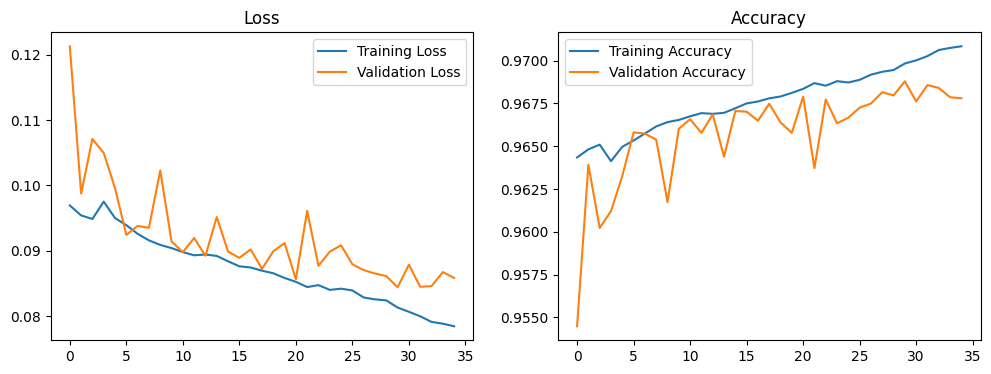

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.subplot(1, 2, 2)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()



In [ ]:
predictions1 = model1.predict(test_images)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


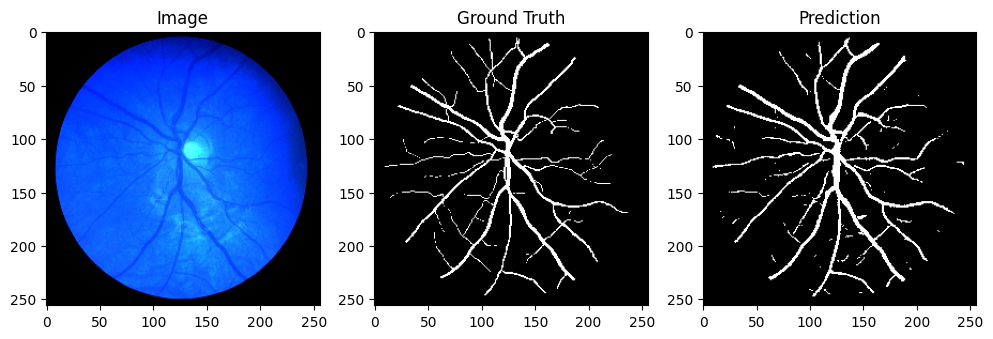

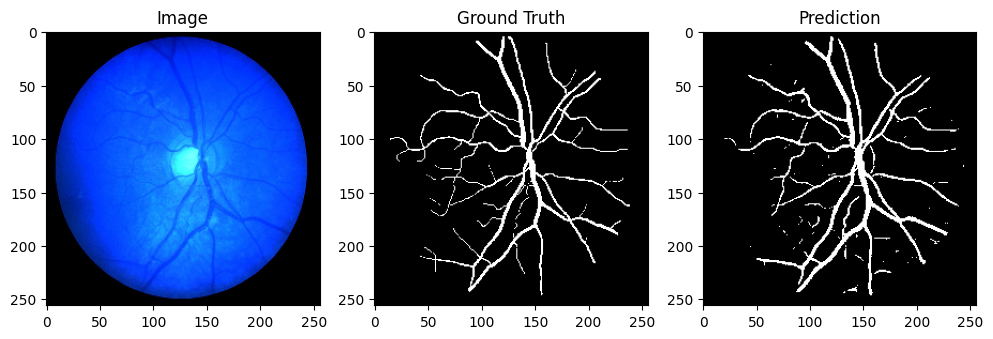

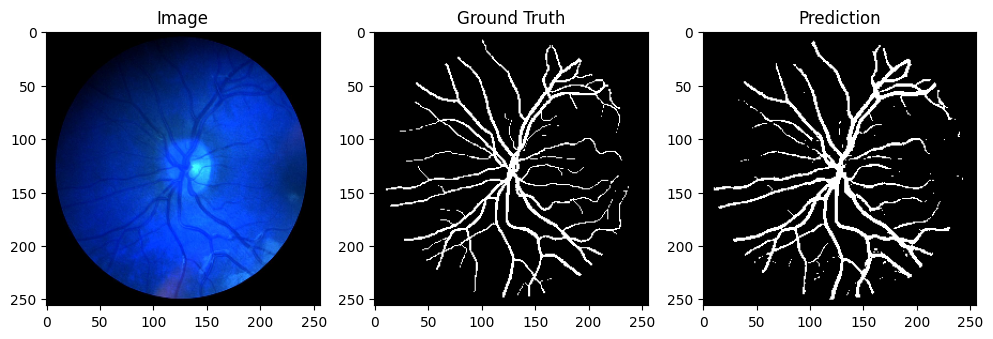

In [ ]:
def visualize_predictions(images, masks, preds, num=3):
    for i in range(num):
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.imshow(images[i])
        plt.title("Image")
        plt.subplot(1, 3, 2)
        plt.imshow(masks[i].squeeze(), cmap='gray')
        plt.title("Ground Truth")
        plt.subplot(1, 3, 3)
        plt.imshow(preds[i].argmax(axis=-1), cmap='gray')
        plt.title("Prediction")
        plt.show()

visualize_predictions(test_images, test_masks, predictions1)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
model1.save('/content/drive/MyDrive/ColabNotebooks/my_trained_model_35_epochs.h5')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
